In [3]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import pickle

plt.rcParams["figure.figsize"] = (10,8)

In [98]:
infile = open("qcd_100000_pt_1000_1200.pkl",'rb')
bkg = pickle.load(infile)
infile = open("higgs_100000_pt_1000_1200.pkl",'rb')
signal = pickle.load(infile)

n_qcd = 2000
n_higgs = 50

bkg_weight = 1
signal_weight = n_higgs/n_qcd

### 1.

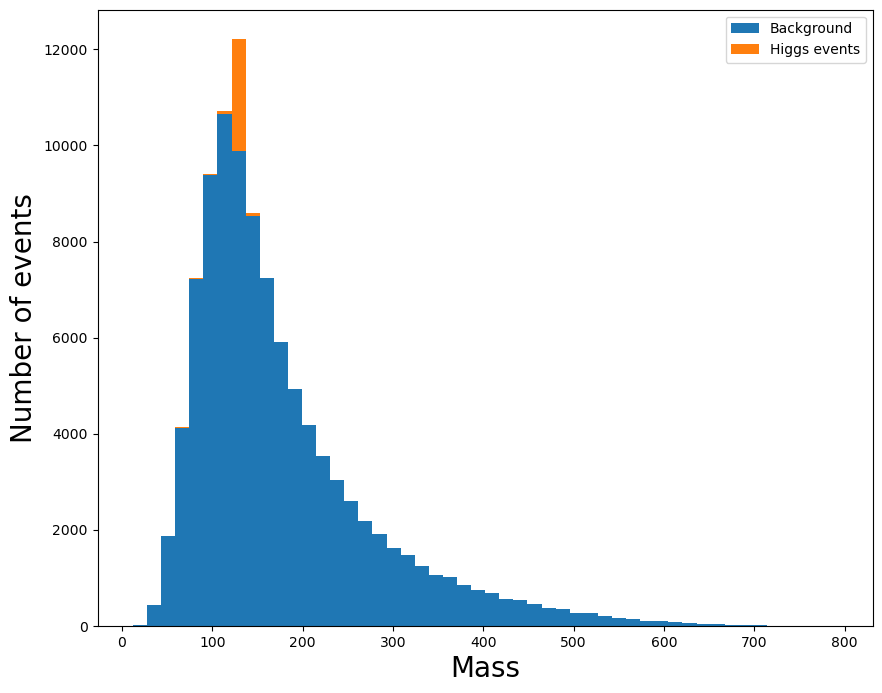

In [99]:
n, bins, patches = plt.hist([bkg['mass'], signal['mass']],
         stacked=True, 
         weights=[[bkg_weight for i in range(len(bkg))], [signal_weight for i in range(len(signal))]],
         bins=50,
         label=['Background', 'Higgs events'],
         #density=True
        )
plt.xlabel('Mass', fontsize=20)
plt.ylabel('Number of events', fontsize=20)
plt.legend()
plt.show()

In [107]:
p = stats.poisson.sf(n_higgs+n_qcd, mu=n_qcd)
p

0.12961287455491954

In [109]:
print(f'The significance is {stats.norm.isf(p):0.3f} sigma')
print(f'The N_higgs/sqrt(N_qcd) approximation is {n_higgs/np.sqrt(n_qcd):0.3f} sigma')

The significance is 1.128 sigma
The N_higgs/sqrt(N_qcd) approximation is 1.118 sigma


### 2.

To find the best cut, we will cut at various mass values above and below the mean Higgs mass.

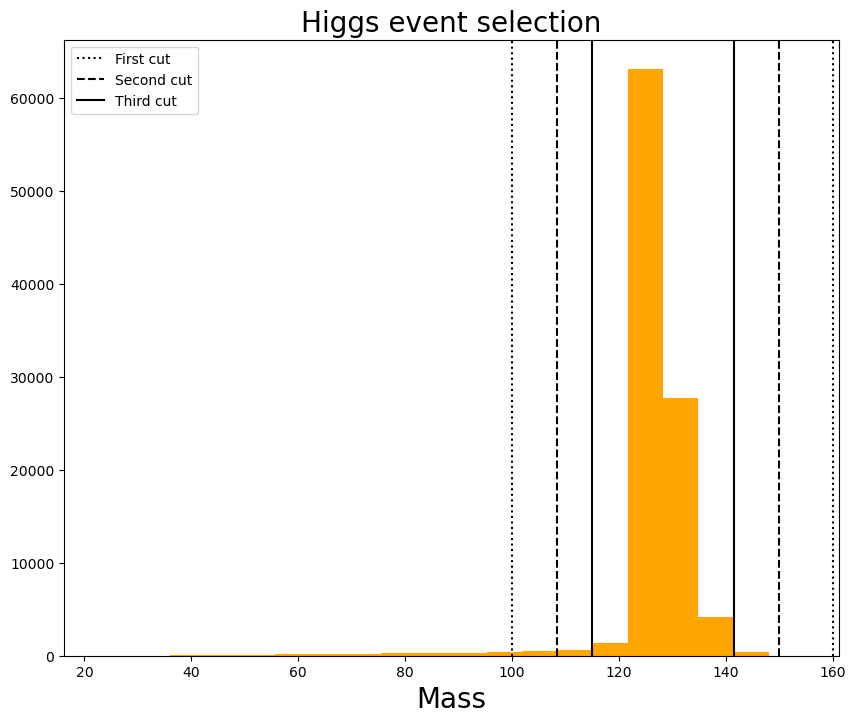

In [136]:
plt.hist(signal['mass'], bins=20, color='orange')
plt.axvline(100, linestyle=':', c='k', label='First cut')
plt.axvline(160, linestyle=':', c='k')
plt.axvline(108.5, linestyle='--', c='k', label='Second cut')
plt.axvline(150, linestyle='--', c='k')
plt.axvline(115, linestyle='-', c='k', label='Third cut')
plt.axvline(141.5, linestyle='-', c='k')
plt.title('Higgs event selection', fontsize=20)
plt.xlabel('Mass', fontsize=20)
plt.legend()
plt.show()

We apply these cuts to the signal and background

In [145]:
signal_cuts = [0,0,0]
signal_cuts[0] = signal[(signal['mass'] <= 160) & (signal['mass'] >= 100)]
signal_cuts[1] = signal[(signal['mass'] <= 160) & (signal['mass'] >= 108.5)]
signal_cuts[2] = signal[(signal['mass'] <= 160) & (signal['mass'] >= 115)]

bkg_cuts = [0,0,0]
bkg_cuts[0] = bkg[(bkg['mass'] <= 160) & (bkg['mass'] >= 100)]
bkg_cuts[1] = bkg[(bkg['mass'] <= 150) & (bkg['mass'] >= 108.5)]
bkg_cuts[2] = bkg[(bkg['mass'] <= 141.5) & (bkg['mass'] >= 115)]

In [151]:
signal_norms = [0,0,0]
bkg_norms = [0,0,0]
for i in range(3):
    signal_norms[i] = len(signal_cuts[i]) * n_higgs/len(bkg)
    bkg_norms[i] = len(bkg_cuts[i]) * n_qcd/len(bkg)

In [160]:
print(f'For the first cuts, n_higgs = {signal_norms[0]} and n_qcd = {bkg_norms[0]}.')
p = stats.poisson.sf(signal_norms[0]+bkg_norms[0], mu=bkg_norms[0])
print(f'This gives us a significance of {stats.norm.isf(p):0.3f} sigma.')
print('')

print(f'For the second cuts, n_higgs = {signal_norms[1]} and n_qcd = {bkg_norms[1]}.')
p = stats.poisson.sf(signal_norms[1]+bkg_norms[1], mu=bkg_norms[1])
print(f'This gives us a significance of {stats.norm.isf(p):0.3f} sigma.')
print('')

print(f'For the third cuts, n_higgs = {signal_norms[2]} and n_qcd = {bkg_norms[2]}.')
p = stats.poisson.sf(signal_norms[2]+bkg_norms[2], mu=bkg_norms[2])
print(f'This gives us a significance of {stats.norm.isf(p):0.3f} sigma.')

For the first cuts, n_higgs = 49.0285 and n_qcd = 724.18.
This gives us a significance of 1.819 sigma.

For the second cuts, n_higgs = 48.7445 and n_qcd = 518.58.
This gives us a significance of 2.123 sigma.

For the third cuts, n_higgs = 48.4185 and n_qcd = 337.6.
This gives us a significance of 2.610 sigma.


### 3.

In [ ]:
fig, ax = plt.subplots(2,7,figsize=(25,10))

for i in range(0,7):
    j = i+7
    column1 = bkg.columns[i]
    column2 = bkg.columns[j]
    ax[0,i].hist([bkg[column1],[signal[column1]], label=['bkg', 'signal']
    ax[0,i].hist(, bkg[column1]], label='signal')
    ax[1,i].hist(signal[column2], label='signal')
    ax[0,i].set_title(column1)
    ax[1,i].set_title(column2)
plt.suptitle('Comparisons of values of features versus event counts for simulated background (blue) and signal (orange) data')
plt.legend()
plt.tight_layout()